# Importing libraries

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
train = pd.read_csv("/kaggle/input/playground-series-s6e1/train.csv")
train.head()

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3
1,1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7
2,2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0
3,3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9
4,4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0


In [5]:
X = train.drop(columns =['id','exam_score'])
X.head()

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty
0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy
1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate
2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate
3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate
4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy


In [6]:
y= train['exam_score']
y.head()

0     78.3
1     46.7
2     99.0
3     63.9
4    100.0
Name: exam_score, dtype: float64

# Univarient analysis 

<Axes: title={'center': 'Gender distribution'}, ylabel='count'>

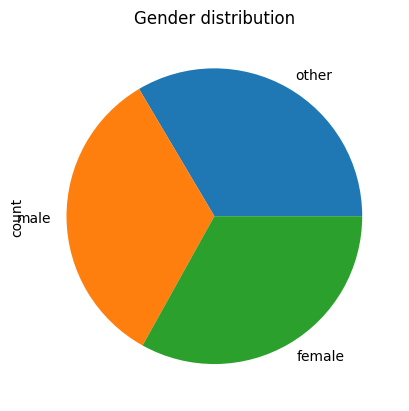

In [7]:
train['gender'].value_counts().plot(kind="pie", title='Gender distribution')

<Axes: title={'center': 'Course distribution'}, ylabel='count'>

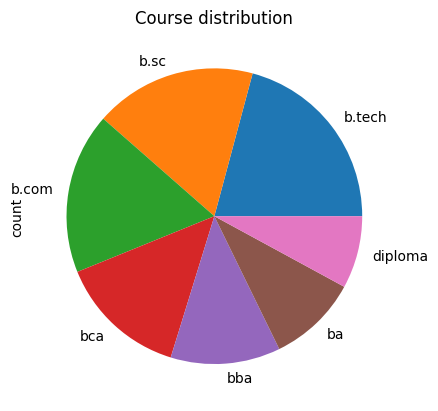

In [8]:
train['course'].value_counts().plot(kind="pie", title='Course distribution')

<Axes: title={'center': 'internet_access distribution'}, ylabel='count'>

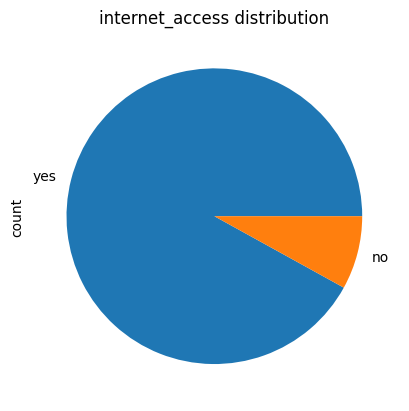

In [9]:
train['internet_access'].value_counts().plot(kind="pie", title='internet_access distribution')

* Lot's of student have internet access 

<Axes: title={'center': 'sleep_quality distribution'}, ylabel='count'>

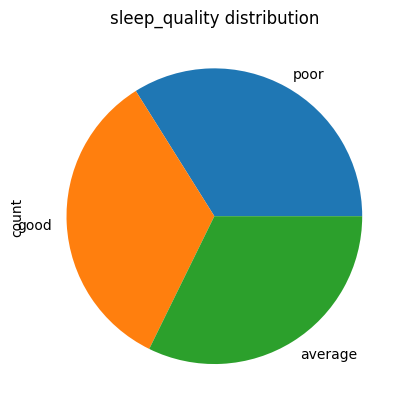

In [10]:
train['sleep_quality'].value_counts().plot(kind="pie", title='sleep_quality distribution')

<Axes: title={'center': 'exam_difficulty distribution'}, ylabel='count'>

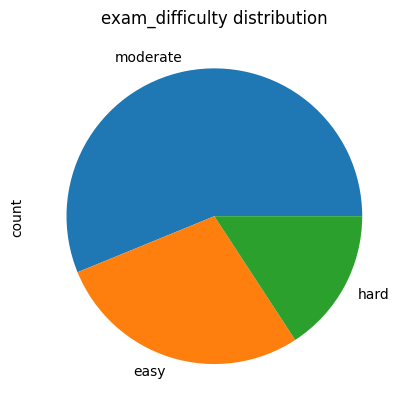

In [11]:
train['exam_difficulty'].value_counts().plot(kind="pie", title='exam_difficulty distribution')

* For lots of student exam difficulty is moderate but for some its hard and remaining things its easy.

<Axes: title={'center': 'facility_rating distribution'}, ylabel='count'>

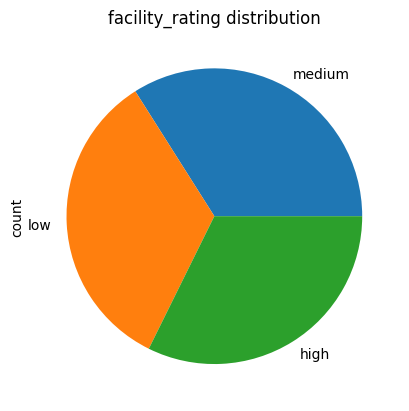

In [12]:
train['facility_rating'].value_counts().plot(kind="pie", title='facility_rating distribution')

* we have same distrubution of facility rating.

In [13]:
X.describe()

,age,study_hours,class_attendance,sleep_hours
count,630000.000000,630000.000000,630000.000000,630000.000000
mean,20.545821,4.002337,71.987261,7.072758
std,2.260238,2.359880,17.430098,1.744811
min,17.000000,0.080000,40.600000,4.100000
25%,19.000000,1.970000,57.000000,5.600000
50%,21.000000,4.000000,72.600000,7.100000
75%,23.000000,6.050000,87.200000,8.600000
max,24.000000,7.910000,99.400000,9.900000


* After checking the min, max and mean of the training data we can say that we dont have messy data.
  

# Bivarient analysis

=== BIVARIATE ANALYSIS ===

Numeric columns: ['age', 'study_hours', 'class_attendance', 'sleep_hours', 'exam_score']
Categorical columns: ['gender', 'course', 'internet_access', 'sleep_quality', 'study_method', 'facility_rating', 'exam_difficulty']
Dataset shape: (630000, 13)



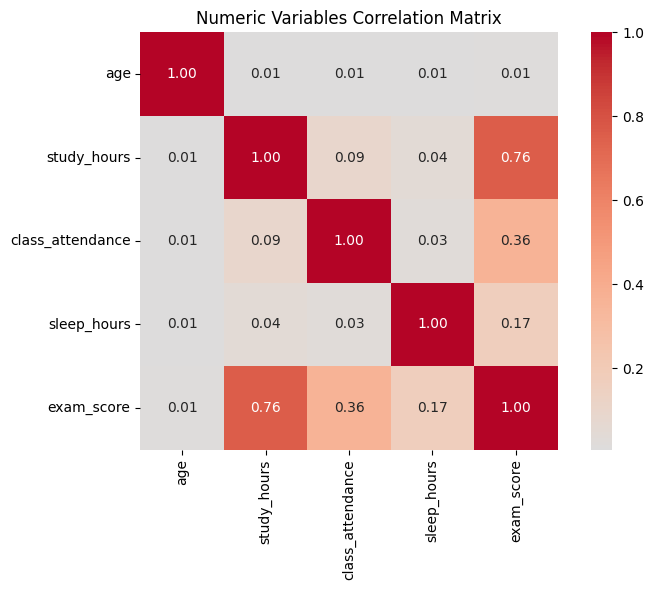

Correlations with exam_score:
exam_score          1.000000
study_hours         0.762267
class_attendance    0.360954
sleep_hours         0.167410
age                 0.010472
Name: exam_score, dtype: float64



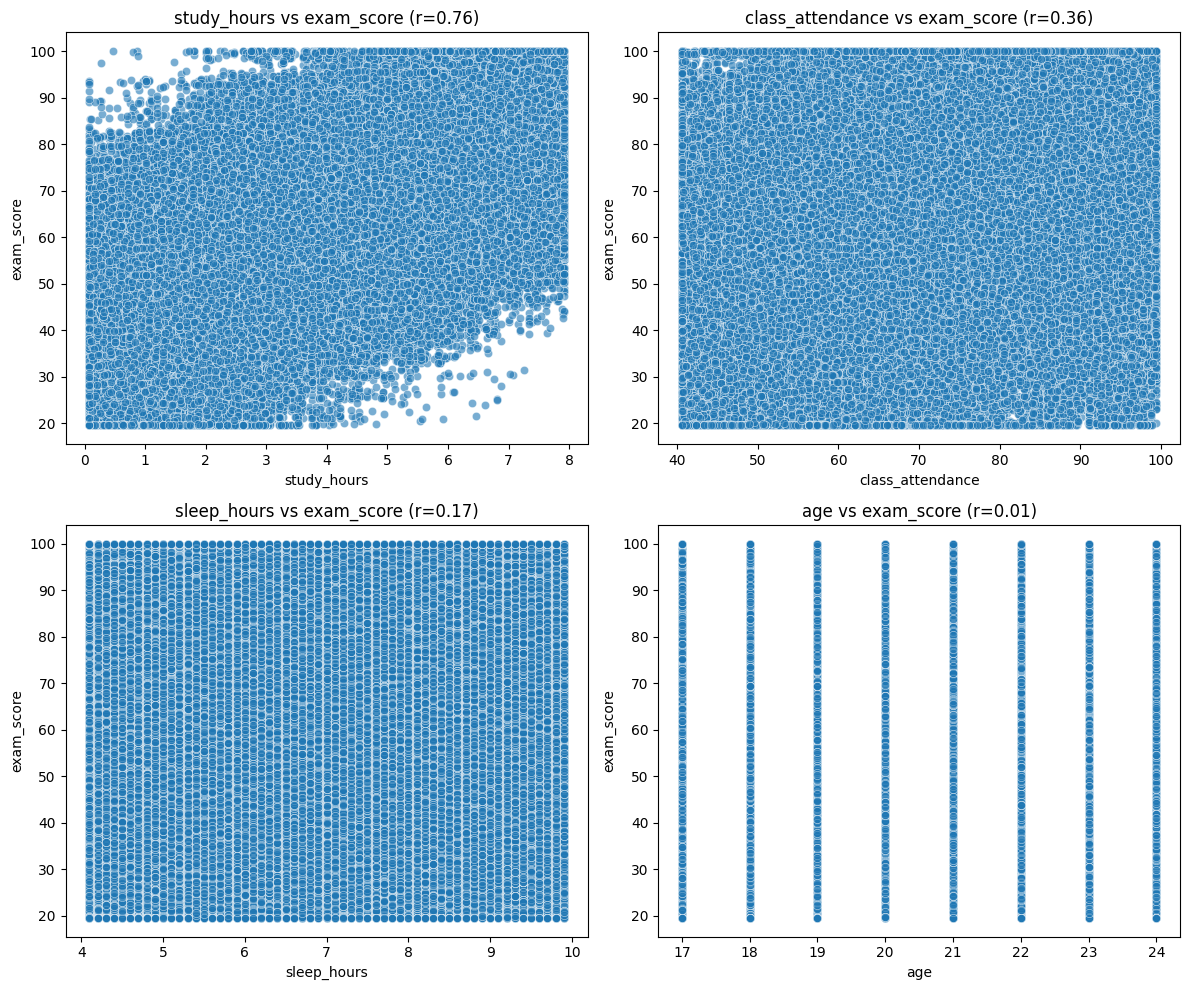

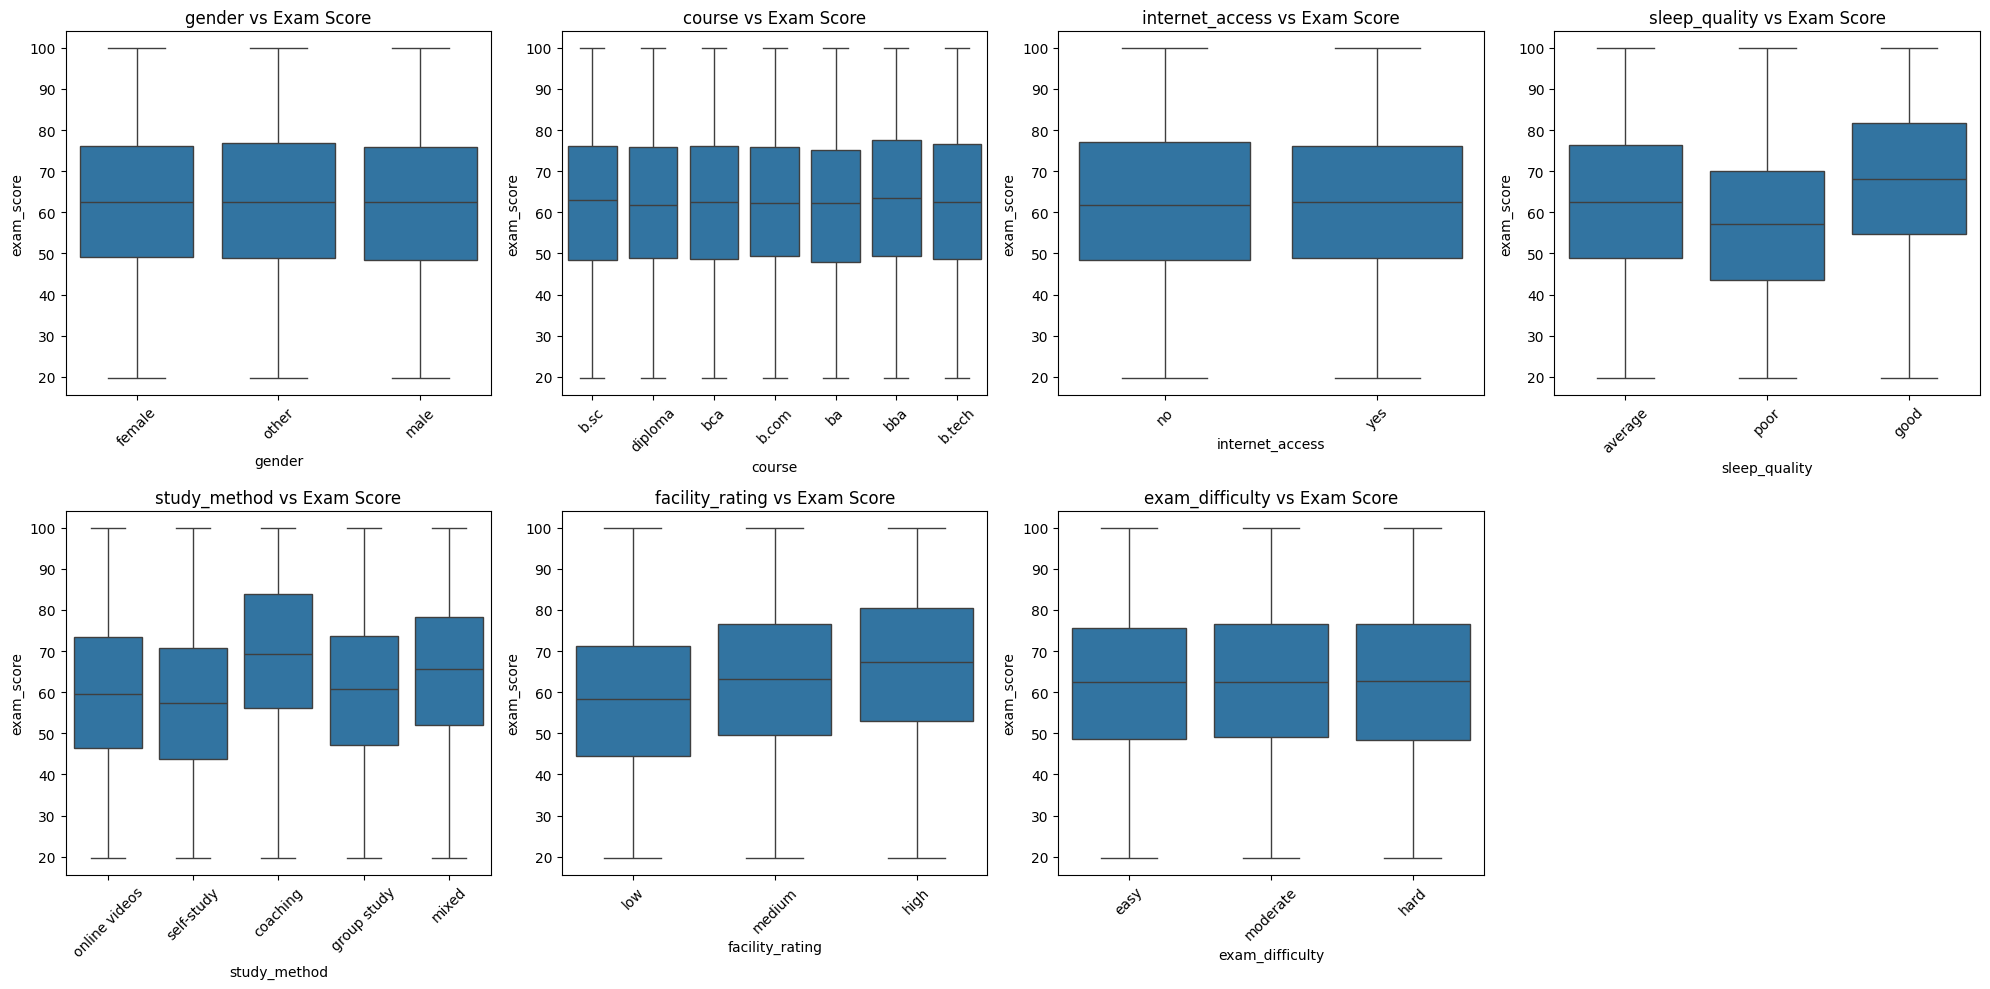

Mean Exam Score by Category:

gender:
gender
other     62.78
female    62.56
male      62.18
Name: exam_score, dtype: float64

course:
course
bba        63.23
bca        62.59
b.com      62.54
b.tech     62.52
diploma    62.40
b.sc       62.30
ba         61.89
Name: exam_score, dtype: float64

internet_access:
internet_access
yes    62.51
no     62.48
Name: exam_score, dtype: float64

sleep_quality:
sleep_quality
good       67.88
average    62.66
poor       57.00
Name: exam_score, dtype: float64

study_method:
study_method
coaching         69.27
mixed            65.10
group study      60.53
online videos    59.73
self-study       57.70
Name: exam_score, dtype: float64

facility_rating:
facility_rating
high      66.71
medium    63.03
low       57.95
Name: exam_score, dtype: float64

exam_difficulty:
exam_difficulty
hard        62.67
moderate    62.61
easy        62.21
Name: exam_score, dtype: float64

=== Categorical Associations (Chi-Square Test) ===

gender vs internet_access:
Chi2 p-

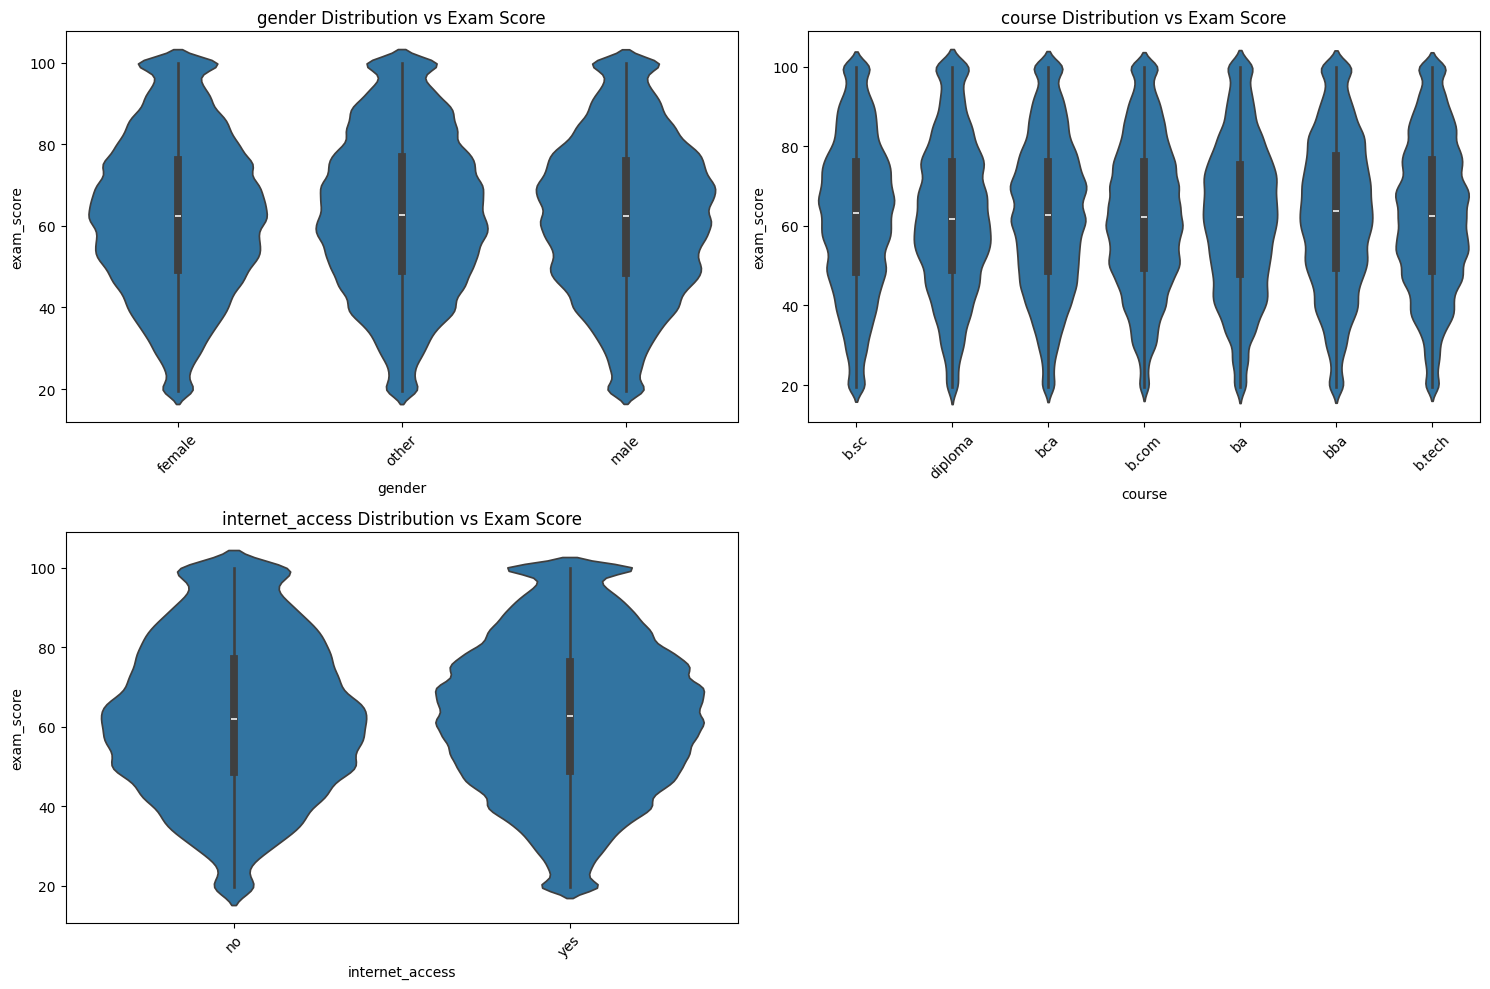


=== SUMMARY ===
✅ Strongest numeric correlate: study_hours
✅ Key insights from boxplots above
✅ Run on full dataset or sample(train, 50000) for speed


In [14]:

from scipy.stats import chi2_contingency


print("=== BIVARIATE ANALYSIS ===\n")

# 1. IDENTIFY COLUMN TYPES
num_cols = ['age', 'study_hours', 'class_attendance', 'sleep_hours', 'exam_score']
cat_cols = ['gender', 'course', 'internet_access', 'sleep_quality', 'study_method', 'facility_rating', 'exam_difficulty']

print("Numeric columns:", num_cols)
print("Categorical columns:", cat_cols)
print(f"Dataset shape: {train.shape}\n")

# 2. NUMERIC vs NUMERIC: CORRELATION MATRIX & HEATMAP
plt.figure(figsize=(8, 6))
corr_matrix = train[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True, fmt='.2f')
plt.title('Numeric Variables Correlation Matrix')
plt.tight_layout()
plt.show()

print("Correlations with exam_score:")
print(corr_matrix['exam_score'].sort_values(ascending=False))
print()

# 3. NUMERIC vs NUMERIC: SCATTER PLOTS (key pairs with exam_score)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
key_pairs = [('study_hours', 'exam_score'), ('class_attendance', 'exam_score'), 
             ('sleep_hours', 'exam_score'), ('age', 'exam_score')]

for i, (x, y) in enumerate(key_pairs):
    ax = axes[i//2, i%2]
    sns.scatterplot(data=train, x=x, y=y, alpha=0.6, ax=ax)
    ax.set_title(f'{x} vs {y} (r={corr_matrix.loc[x,y]:.2f})')
plt.tight_layout()
plt.show()

# 4. CATEGORICAL vs NUMERIC: BOXPLOTS (vs exam_score)
n_cols = len(cat_cols)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, col in enumerate(cat_cols):
    sns.boxplot(data=train, x=col, y='exam_score', ax=axes[i])
    axes[i].set_title(f'{col} vs Exam Score')
    axes[i].tick_params(axis='x', rotation=45)

# Hide extra subplots
for i in range(len(cat_cols), 8):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# 5. Print mean exam_score by category (top insights)
print("Mean Exam Score by Category:")
for col in cat_cols:
    means = train.groupby(col)['exam_score'].mean().sort_values(ascending=False)
    print(f"\n{col}:")
    print(means.round(2))

# 6. CATEGORICAL vs CATEGORICAL: Example crosstabs & chi-square
print("\n=== Categorical Associations (Chi-Square Test) ===")
key_pairs_cat = [('gender', 'internet_access'), ('course', 'sleep_quality'), ('study_method', 'exam_difficulty')]

for col1, col2 in key_pairs_cat:
    crosstab = pd.crosstab(train[col1], train[col2])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    print(f"\n{col1} vs {col2}:")
    print("Chi2 p-value:", round(p, 4), "(significant" if p < 0.05 else "not significant)")
    print(crosstab)

# 7. VIOLIN PLOTS: Distribution by key categorical
plt.figure(figsize=(15, 10))
key_cats = ['gender', 'course', 'internet_access']
for i, col in enumerate(key_cats, 1):
    plt.subplot(2, 2, i)
    sns.violinplot(data=train, x=col, y='exam_score')
    plt.title(f'{col} Distribution vs Exam Score')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\n=== SUMMARY ===")
print("✅ Strongest numeric correlate: study_hours")
print("✅ Key insights from boxplots above")
print("✅ Run on full dataset or sample(train, 50000) for speed")


In [16]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')


In [17]:

SAMPLE_SIZE = 50000 
print(f"📉 Sampling {len(train)} -> {SAMPLE_SIZE} rows (CPU safe)")

train_sample = train.sample(n=SAMPLE_SIZE, random_state=42).reset_index(drop=True)

# === STEP 2: QUICK PREPROCESS ===
num_features = ['age', 'study_hours', 'class_attendance', 'sleep_hours']
cat_features = ['gender', 'course', 'internet_access', 'sleep_quality', 'study_method', 'facility_rating', 'exam_difficulty']
target = 'exam_score'

X = train_sample.drop(columns=[target])
y = train_sample[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline (CPU efficient)
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), cat_features)
])


📉 Sampling 630000 -> 50000 rows (CPU safe)


In [19]:

# === STEP 3: ULTRA-FAST MODELS (Minimal params, small n_estimators) ===
models = {
    'Ridge (Fast)': Ridge(alpha=1.0),
    'RandomForest (Light)': RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42, n_jobs=1),  # n_jobs=1
    'XGBoost (Fast)': XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42, n_jobs=1),
    'LightGBM (Fast)': LGBMRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42, n_jobs=1, verbose=-1)
}

results = []
predictions = {}  # For ensemble


In [20]:

print("🔄 Training 4 FAST models (no GridSearch)...")

for name, model in models.items():
    print(f"  {name}...")
    
    pipe = Pipeline([('prep', preprocessor), ('model', model)])
    pipe.fit(X_train, y_train)
    
    # Predictions
    y_pred_train = pipe.predict(X_train)
    y_pred_test = pipe.predict(X_test)
    
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    
    results.append({
        'Model': name,
        'Train_R2': round(train_r2, 4),
        'Test_R2': round(test_r2, 4),
        'RMSE': round(rmse, 2),
        'Time': 'FAST'
    })
    
    predictions[name] = y_pred_test
    print(f"    R²: {test_r2:.4f}")

# === STEP 4: SIMPLE ENSEMBLE (Average top 3) ===
print("\n🔄 SIMPLE ENSEMBLE...")
top3_preds = np.mean([
    predictions['XGBoost (Fast)'],
    predictions['LightGBM (Fast)'],
    predictions['RandomForest (Light)']
], axis=0)

ens_r2 = r2_score(y_test, top3_preds)
ens_rmse = np.sqrt(mean_squared_error(y_test, top3_preds))

results.append({
    'Model': 'Ensemble (Avg)',
    'Train_R2': '-',
    'Test_R2': round(ens_r2, 4),
    'RMSE': round(ens_rmse, 2),
    'Time': 'FAST'
})

# === STEP 5: RESULTS ===
results_df = pd.DataFrame(results)
print("\n🏆 RESULTS (50k sample):")
print(results_df.sort_values('Test_R2', ascending=False))

print(f"\n✅ BEST: {results_df.iloc[0]['Model']} | R²: {results_df.iloc[0]['Test_R2']}")
print("\n⏱️  Completed in <2 mins! 🎉")

# === STEP 6: SAVE BEST PIPELINE ===
best_name = results_df.iloc[0]['Model']
if 'XGBoost' in best_name:
    best_pipe = Pipeline([('prep', preprocessor), ('model', models['XGBoost (Fast)'])])
elif 'LightGBM' in best_name:
    best_pipe = Pipeline([('prep', preprocessor), ('model', models['LightGBM (Fast)'])])
else:
    best_pipe = Pipeline([('prep', preprocessor), ('model', models['RandomForest (Light)'])])

best_pipe.fit(X_train, y_train)
print(f"\n💾 Best pipeline saved as 'best_pipe' (R²: {r2_score(y_test, best_pipe.predict(X_test)):.4f})")

# For FULL dataset later: replace train_sample with train
print("\n🔥 For FULL 630k later: Set SAMPLE_SIZE=None & add n_estimators=200")


🔄 Training 4 FAST models (no GridSearch)...
  Ridge (Fast)...
    R²: 0.7728
  RandomForest (Light)...
    R²: 0.7432
  XGBoost (Fast)...
    R²: 0.7713
  LightGBM (Fast)...
    R²: 0.7717

🔄 SIMPLE ENSEMBLE...

🏆 RESULTS (50k sample):
                  Model Train_R2  Test_R2  RMSE  Time
0          Ridge (Fast)   0.7809   0.7728  8.92  FAST
3       LightGBM (Fast)   0.7978   0.7717  8.94  FAST
2        XGBoost (Fast)   0.8084   0.7713  8.94  FAST
4        Ensemble (Avg)        -   0.7689  8.99  FAST
1  RandomForest (Light)   0.8037   0.7432  9.48  FAST

✅ BEST: Ridge (Fast) | R²: 0.7728

⏱️  Completed in <2 mins! 🎉

💾 Best pipeline saved as 'best_pipe' (R²: 0.7432)

🔥 For FULL 630k later: Set SAMPLE_SIZE=None & add n_estimators=200


In [21]:
import pandas as pd
import joblib

# Load test data (UPDATE PATH)
test = pd.read_csv('/kaggle/input/playground-series-s6e1/test.csv')  

# Get predictions from best model
test_predictions = best_pipe.predict(test)

# Create submission
submission = pd.DataFrame({
    'id': test['id'],  # Adjust column name if needed
    'exam_score': test_predictions.clip(0, 100).round(2)
})

# SAVE
submission.to_csv('submission.csv', index=False)
joblib.dump(best_pipe, 'best_model.pkl')

print("✅ submission.csv SAVED")
print("✅ best_model.pkl SAVED")
print(submission.head())


✅ submission.csv SAVED
✅ best_model.pkl SAVED
       id  exam_score
0  630000       71.04
1  630001       68.10
2  630002       87.38
3  630003       55.25
4  630004       38.53
